# Importing data

In [7]:
# !pip install zipfile36

In [8]:
# from google.colab import drive
# import zipfile36 as zipfile
# drive.mount('/content/drive')

In [9]:
# zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/engl_handwritter-dataset.zip', 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()

# Importing Libraries

In [10]:
# Default libraries, packages for data management, visualization and Computer vision libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Sklearn package -> function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Tensorflow packages
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import (Dense, Dropout, Conv2D, MaxPool2D,
                                     BatchNormalization, Flatten, GlobalAveragePooling2D, Input)
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.applications import EfficientNetB7, MobileNetV2, VGG19, DenseNet121

# Helper Functions & Hyperparameters

In [11]:
def directory_to_df(path : str):
    df = []
    chars = 'abcdefghijklmnopqrstuvwxyz'    # to include lowercase letters only
    for cls in os.listdir(path):
        cls_path = os.path.join(path,cls)
        cls_name = cls.split('_')[0]
        if not cls_name in chars:
            continue
        for img_path in os.listdir(cls_path):
            direct = os.path.join(cls_path,img_path)
            df.append([direct,cls_name])

    df = pd.DataFrame(df, columns=['image','label'])
    print("The number of samples found:",len(df))
    return df.copy()

def read_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def show_image(img, label=None) -> None:
    plt.imshow(img, cmap='gray')
    plt.axis(False)
    plt.title(label)
    plt.show()

def clbck(model_name):
    # The function is defined to make the callbacks for training the models
    ERLY = EarlyStopping(patience=10, min_delta=0.01, start_from_epoch=10, verbose=1)
    RD = ReduceLROnPlateau(patience=5, min_delta=0.01, factor=0.5)
    CHK = ModelCheckpoint(f'{model_name}.h5',verbose=1, save_best_only=True)
    return [ERLY,RD,CHK]

In [12]:
# Pre-defined hyperparameters
# IMG_SHAPE = (32,32)  # REAL VALUE
# IMG_SIZE = (32,32,3) # REAL VALUE
IMG_SHAPE = (100,100)
IMG_SIZE = (100,100,3)
# BATCH_SIZE = 32 # REAL VALUE
BATCH_SIZE = 64
opt = Adam(learning_rate=0.00001, epsilon=1e-6)
loss = 'categorical_crossentropy'
EPOCHS = 20

# Reading & preparing the dataset

In [23]:
# Reading the dataset in dataframe
main_path = './data/train/english.csv'
# df = directory_to_df(main_path) # convert the dataset into df of two columns
df = pd.read_csv('data/english.csv')

# Correct path
df['image'] = 'data/' + df['image']
df['image'] = df['image'].apply(lambda x: x if os.path.exists(x) else None)

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/train/english.csv'

In [14]:
df['label'].value_counts()

label
0    55
k    55
X    55
Y    55
Z    55
     ..
P    55
Q    55
R    55
S    55
z    55
Name: count, Length: 62, dtype: int64

## Splitting the dataframe

In [15]:
# Splitting for training & testing (70,30 respectively)
X, y = df['image'], df['label']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=41)
training_df = pd.concat((X_train,y_train), axis=1)
testing_df = pd.concat((X_test,y_test), axis=1)

In [16]:
# Splitting for training & validation (75,25 respectively) -> the training set size = 52.5%
X, y = training_df['image'], training_df['label']
X_train, X_valid, y_train, y_valid = train_test_split(X,y , test_size=0.25, random_state=41)
training_df = pd.concat((X_train,y_train), axis=1)
validation_df = pd.concat((X_valid,y_valid), axis=1)

In [17]:
training_df

,image,label
434,None,7
3063,None,t
2816,None,p
3146,None,v
1191,None,L
...,...,...
2839,None,p
1128,None,K
2814,None,p
1636,None,T


# Creating generators

In [18]:
# Creating generators
gen = ImageDataGenerator(dtype=np.int32, brightness_range=[0.0,1.0], fill_mode='nearest')
# gen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
#                     width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")
gen2 = ImageDataGenerator(dtype=np.int32, fill_mode='nearest')
train_gen = gen.flow_from_dataframe(training_df, x_col='image',y_col='label', batch_size=BATCH_SIZE,
                                   target_size=IMG_SHAPE)
valid_gen = gen2.flow_from_dataframe(validation_df, x_col='image', y_col='label', batch_size=BATCH_SIZE,
                                        target_size=IMG_SHAPE, shuffle=False)
test_gen = gen2.flow_from_dataframe(testing_df, x_col='image', y_col='label', batch_size=BATCH_SIZE,
                                       target_size=IMG_SHAPE, shuffle=False)

TypeError: All values in column x_col=image must be strings.

In [19]:
len(train_gen)

NameError: name 'train_gen' is not defined

In [21]:
# Making a mapping of the classes and the inverse for later processings
mapping = train_gen.class_indices
mapping_inverse = dict(map(lambda x: tuple(reversed(x)), mapping.items()))

NameError: name 'train_gen' is not defined

In [20]:
# Reading a sample from the dataset
BATCH_NUM = 10
IMG_NUM = 2      # from 0 to 31
show_image(train_gen[BATCH_NUM][0][IMG_NUM],mapping_inverse[train_gen[BATCH_NUM][1][IMG_NUM].argmax()])
print('The shape of the image:',train_gen[BATCH_NUM][0][IMG_NUM].shape)

NameError: name 'train_gen' is not defined

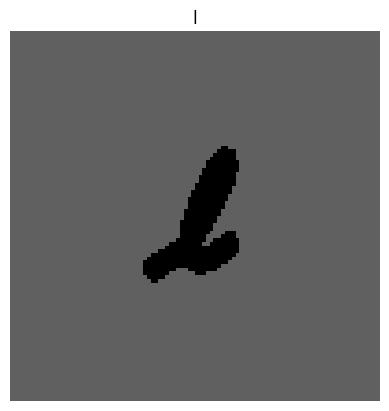

The shape of the image: (100, 100, 3)


In [ ]:
# Reading another sample from the dataset
BATCH_NUM = 20
IMG_NUM = 30      # from 0 to 31
show_image(train_gen[BATCH_NUM][0][IMG_NUM],mapping_inverse[train_gen[BATCH_NUM][1][IMG_NUM].argmax()])
print('The shape of the image:',train_gen[BATCH_NUM][0][IMG_NUM].shape)

## Custom CNN

In [22]:
# Custom CNN
CNN_model = Sequential()
CNN_model.add(Input(shape=IMG_SIZE, batch_size=BATCH_SIZE, name='Input'))
CNN_model.add(Conv2D(64, (3,3), strides=1, activation='relu', padding='same'))
CNN_model.add(Conv2D(64, (3,3), activation='relu'))
CNN_model.add(MaxPool2D((3,3)))
CNN_model.add(Conv2D(128, (3,3), activation='relu'))
CNN_model.add(Dropout(0.2))
CNN_model.add(Conv2D(128, (3,3), strides=2, activation='relu', padding='same'))
CNN_model.add(MaxPool2D((2,2)))
CNN_model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
CNN_model.add(Dropout(0.2))
CNN_model.add(Conv2D(256, (2,2), activation='relu', padding='same'))
CNN_model.add(MaxPool2D(2,2))
CNN_model.add(Flatten())
CNN_model.add(Dense(1024, activation='selu'))
CNN_model.add(Dense(len(mapping), activation='softmax'))

NameError: name 'mapping' is not defined

In [ ]:
CNN_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (64, 100, 100, 64)        1792      
                                                                 
 conv2d_37 (Conv2D)          (64, 98, 98, 64)          36928     
                                                                 
 max_pooling2d_21 (MaxPooli  (64, 32, 32, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (64, 30, 30, 128)         73856     
                                                                 
 dropout_10 (Dropout)        (64, 30, 30, 128)         0         
                                                                 
 conv2d_39 (Conv2D)          (64, 15, 15, 128)         147584    
                                                      

In [ ]:
# Default parameters of adam will be used for the custom CNN
CNN_model.compile(optimizer=Adam(), loss=loss, metrics=['accuracy'])

In [ ]:
history = CNN_model.fit(train_gen, epochs=EPOCHS, validation_data=valid_gen, callbacks=clbck("model"), 
                        steps_per_epoch=len(train_gen), validation_steps=len(valid_gen))

Epoch 1/20
28/28 [==============================] - ETA: 0s - loss: 7.9566 - accuracy: 0.0156
Epoch 1: val_loss improved from inf to 4.12775, saving model to model.h5
28/28 [==============================] - 72s 2s/step - loss: 7.9566 - accuracy: 0.0156 - val_loss: 4.1278 - val_accuracy: 0.0218 - lr: 0.0010
Epoch 2/20


c:\Users\kirit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - ETA: 0s - loss: 4.1251 - accuracy: 0.0145
Epoch 2: val_loss did not improve from 4.12775
28/28 [==============================] - 65s 2s/step - loss: 4.1251 - accuracy: 0.0145 - val_loss: 4.1321 - val_accuracy: 0.0084 - lr: 0.0010
Epoch 3/20
28/28 [==============================] - ETA: 0s - loss: 4.0456 - accuracy: 0.0402
Epoch 3: val_loss improved from 4.12775 to 3.86999, saving model to model.h5
28/28 [==============================] - 64s 2s/step - loss: 4.0456 - accuracy: 0.0402 - val_loss: 3.8700 - val_accuracy: 0.0720 - lr: 0.0010
Epoch 4/20
28/28 [==============================] - ETA: 0s - loss: 3.5295 - accuracy: 0.1352
Epoch 4: val_loss improved from 3.86999 to 3.11285, saving model to model.h5
28/28 [==============================] - 68s 2s/step - loss: 3.5295 - accuracy: 0.1352 - val_loss: 3.1129 - val_accuracy: 0.1776 - lr: 0.0010
Epoch 5/20
28/28 [==============================] - ETA: 0s - loss: 2.8333 - accuracy: 0.2816
Epoch 5:

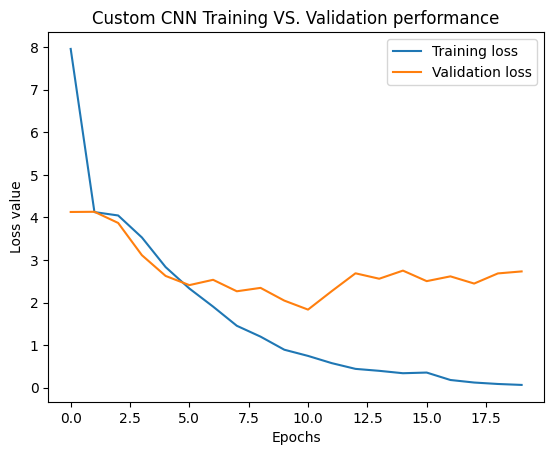

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.title("Custom CNN Training VS. Validation performance")
plt.show()

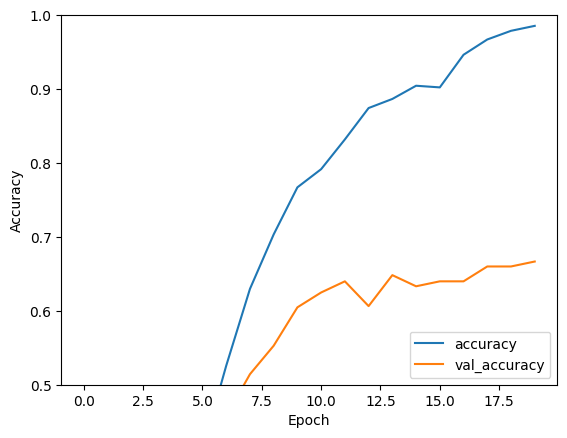

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
# Making a prediction out of the Custom CNN for the testing set for the evaluation
prediction = CNN_model.predict(test_gen)
pred = list(map(lambda x: mapping_inverse[np.argmax(x)], prediction))
y_test = list(map(lambda x: mapping_inverse[x],test_gen.classes))

16/16 [==============================] - 12s 740ms/step


In [ ]:
print('\t\tThe Custom CNN Evaluation Performance')
print(classification_report(y_test, pred))

		The Custom CNN Evaluation Performance
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        16
           1       0.73      0.50      0.59        16
           2       0.88      0.88      0.88        17
           3       0.80      0.89      0.84        18
           4       0.88      0.70      0.78        20
           5       0.67      0.91      0.77        11
           6       0.68      0.68      0.68        19
           7       0.94      0.89      0.91        18
           8       0.63      0.92      0.75        13
           9       0.71      0.75      0.73        20
           A       1.00      0.87      0.93        23
           B       0.88      0.82      0.85        17
           C       0.75      0.71      0.73        17
           D       0.85      0.73      0.79        15
           E       0.94      0.89      0.92        19
           F       0.87      0.93      0.90        14
           G       0.82      0.70      0.

In [ ]:
validation_loss, validation_acc = CNN_model.evaluate(valid_gen)
print(f"Validation Accuracy: {validation_acc * 100:.2f}%")

10/10 [==============================] - 7s 674ms/step - loss: 2.7318 - accuracy: 0.6667
Validation Accuracy: 66.67%


1/1 [==============================] - 0s 32ms/step


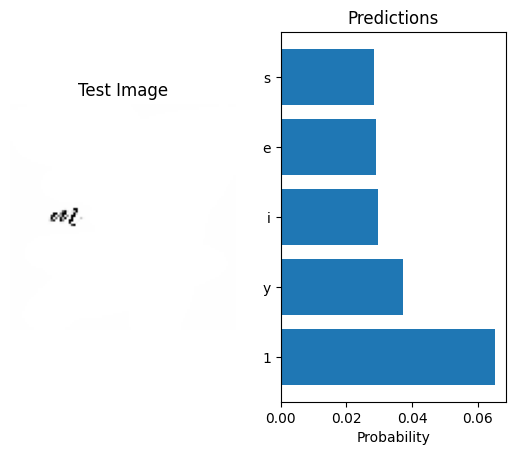

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image de test
test_image_path = 'Test/ocr_m.jpg'
test_img = image.load_img(test_image_path, target_size=(100, 100))

# Convertir l'image en tableau Numpy
test_img_array = image.img_to_array(test_img)
test_img_array = np.expand_dims(test_img_array, axis=0)
test_img_array /= 255.0  # Normaliser l'image

# Utiliser le modèle pour la prédiction
predictions = CNN_model.predict(test_img_array)

# Récupérer les noms des classes
class_names = list(train_gen.class_indices.keys())

# Obtenir les indices des 5 meilleures prédictions
top5_indices = np.argsort(predictions.ravel())[-5:][::-1]
top5_classes = [class_names[i] for i in top5_indices]
top5_probs = predictions.ravel()[top5_indices]

# Affichage de l'image
plt.subplot(1, 2, 1)
plt.imshow(test_img)
plt.title('Test Image')
plt.axis('off')

# Affichage des résultats de la prédiction (Top 5)
plt.subplot(1, 2, 2)
plt.barh(top5_classes, top5_probs)
plt.xlabel('Probability')
plt.title('Predictions')
plt.show()